# Pandas merge tests

In [6]:
import pandas as pd
import random as rd
import numpy as np

In [96]:
valeurs=["A","B","C",np.nan,None]
rd.choice(valeurs)

'A'

In [97]:
def choices(x,y):
    result=[]
    for i in range(x):
        result.append([rd.choice(valeurs) for i in range(y)])
    return result

In [98]:
choices(5,10)

[[None, 'B', 'C', 'B', 'C', 'C', 'C', 'B', nan, None],
 ['B', 'C', 'A', 'B', 'C', nan, None, 'B', nan, None],
 [None, nan, 'A', 'C', nan, 'A', nan, 'B', 'C', nan],
 ['A', nan, None, 'C', 'C', 'C', None, 'B', 'B', 'B'],
 ['B', 'A', nan, 'A', None, 'C', 'A', None, nan, None]]

In [99]:
df1=pd.DataFrame(choices(5,10))
df2=pd.DataFrame(choices(5,10))

In [100]:
df1

,0,1,2,3,4,5,6,7,8,9
0,B,B,NaN,B,NaN,A,C,B,NaN,C
1,C,B,C,None,None,C,B,None,C,B
2,NaN,A,None,A,B,C,None,None,C,NaN
3,B,A,A,C,B,NaN,None,None,C,NaN
4,B,None,B,None,None,A,A,None,None,A


In [101]:
df2

,0,1,2,3,4,5,6,7,8,9
0,NaN,B,None,None,C,None,B,C,NaN,B
1,B,A,NaN,B,None,B,NaN,A,NaN,B
2,None,A,NaN,A,C,None,A,B,A,None
3,C,C,NaN,A,None,B,None,NaN,B,A
4,NaN,NaN,A,NaN,NaN,A,NaN,None,C,None


In [103]:
df3=df1.combine_first(df2)
df3

,0,1,2,3,4,5,6,7,8,9
0,B,B,None,B,C,A,C,B,NaN,C
1,C,B,C,B,None,C,B,A,C,B
2,None,A,NaN,A,B,C,A,B,C,None
3,B,A,A,C,B,B,None,NaN,C,A
4,B,NaN,B,NaN,NaN,A,A,None,C,A


In [106]:
pd.melt(df3,id_vars=[0])

,0,variable,value
0,B,1,B
1,C,1,B
2,None,1,A
3,B,1,A
4,B,1,NaN
5,B,2,None
6,C,2,C
7,None,2,NaN
8,B,2,A
9,B,2,B


# Kalaba findall tests

In [13]:
import re
extrait=re.findall(ur"\\[^{]+{}",u'\\begin{preview}\\begin{flushleft}\\louveBSgNom{}\\DEFBSgNom{}\\end{flushleft}\\end{preview}')
print " ".join(extrait)

\louveBSgNom{} \DEFBSgNom{}


# Cryptograms

In [1]:
cryptogram="""
free cat nkrpvoa lrphap nwjtu yrmoa zrqa ypjyanh 
zoeex bovvamloa zfrtbw paotkrpzu fwkt nwvuprta vwjom rpcmupwtb
covam zrqom ukavwtowjm cwth
"""

In [ ]:
import re
from nltk import ngrams

In [ ]:
def joinNGrams(nGrams):
    return ["".join(e) for e in list(nGrams)]

In [29]:
    
mots=re.split("\W+",cryptogram.strip())
#ngrams={k:0 for k in [1,2,3]}
letters=[]
bigrams=[]
trigrams=[]
for mot in mots:
    letters.extend(ngrams(mot,1))
    bigrams.extend(ngrams(mot,2))
    trigrams.extend(ngrams(mot,3))

freq1grams={}
for element in joinNGrams(letters):
    if not element in freq1grams:
        freq1grams[element]=0
    freq1grams[element]+=1
    
    
freq2grams={}
for element in joinNGrams(bigrams):
    if not element in freq2grams:
        freq2grams[element]=0
    freq2grams[element]+=1

In [32]:
freq1grams

{'a': 12,
 'b': 3,
 'c': 4,
 'e': 4,
 'f': 3,
 'h': 3,
 'j': 4,
 'k': 4,
 'l': 2,
 'm': 7,
 'n': 4,
 'o': 10,
 'p': 9,
 'q': 2,
 'r': 10,
 't': 9,
 'u': 5,
 'v': 7,
 'w': 9,
 'x': 1,
 'y': 3,
 'z': 5}

In [32]:
with open("Test.yaml", 'r') as stream:
    try:
        test=yaml.load(stream)
    except ConstructorError,msg:
        print msg

while constructing a mapping
  in "Test.yaml", line 1, column 1
found duplicate key (test)
  in "Test.yaml", line 4, column 1


In [20]:
import itertools as it
base="bananas"
words=set()
for e in it.permutations(base,4):
    words.add("".join(e))
print len(words)

114


In [10]:
def flatten(lis):
     for item in lis:
         if not isinstance(item, basestring):
             for x in flatten(item):
                 yield x
         else:        
             yield item
list(flatten([u'\\AVEC', [u'\\DEFMSg', u'\\villageMSg']]))


[u'\\AVEC', u'\\DEFMSg', u'\\villageMSg']

In [1]:
import random

In [2]:
consonnes="ptkbdgmnNfsSvzZrljw"
voyelles="iueoa"

In [3]:
cons={c:c+random.choice(voyelles) for c in consonnes}
cons={c:c+"i" for c in consonnes}
cons

{'N': 'Ni',
 'S': 'Si',
 'Z': 'Zi',
 'b': 'bi',
 'd': 'di',
 'f': 'fi',
 'g': 'gi',
 'j': 'ji',
 'k': 'ki',
 'l': 'li',
 'm': 'mi',
 'n': 'ni',
 'p': 'pi',
 'r': 'ri',
 's': 'si',
 't': 'ti',
 'v': 'vi',
 'w': 'wi',
 'z': 'zi'}

In [4]:
syllabes=[c+v for c in consonnes for v in voyelles]
for s in syllabes:
    print "%s: %s"%(s,cons[s[0]]+s[1])
for c in consonnes:
    print "%s: %s"%(c,c+"i")

pi: pii
pu: piu
pe: pie
po: pio
pa: pia
ti: tii
tu: tiu
te: tie
to: tio
ta: tia
ki: kii
ku: kiu
ke: kie
ko: kio
ka: kia
bi: bii
bu: biu
be: bie
bo: bio
ba: bia
di: dii
du: diu
de: die
do: dio
da: dia
gi: gii
gu: giu
ge: gie
go: gio
ga: gia
mi: mii
mu: miu
me: mie
mo: mio
ma: mia
ni: nii
nu: niu
ne: nie
no: nio
na: nia
Ni: Nii
Nu: Niu
Ne: Nie
No: Nio
Na: Nia
fi: fii
fu: fiu
fe: fie
fo: fio
fa: fia
si: sii
su: siu
se: sie
so: sio
sa: sia
Si: Sii
Su: Siu
Se: Sie
So: Sio
Sa: Sia
vi: vii
vu: viu
ve: vie
vo: vio
va: via
zi: zii
zu: ziu
ze: zie
zo: zio
za: zia
Zi: Zii
Zu: Ziu
Ze: Zie
Zo: Zio
Za: Zia
ri: rii
ru: riu
re: rie
ro: rio
ra: ria
li: lii
lu: liu
le: lie
lo: lio
la: lia
ji: jii
ju: jiu
je: jie
jo: jio
ja: jia
wi: wii
wu: wiu
we: wie
wo: wio
wa: wia
p: pi
t: ti
k: ki
b: bi
d: di
g: gi
m: mi
n: ni
N: Ni
f: fi
s: si
S: Si
v: vi
z: zi
Z: Zi
r: ri
l: li
j: ji
w: wi


In [ ]:
import networkx as nx

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [6]:
arbre=nx.DiGraph()
#arbre.add_nodes_from(["Phrase","GN","GV","Det","N","V"])
arbre.add_edges_from([("Phrase","GN"),("Phrase","GV"),("GN","Det"),("GN","N"),("GV","V")])

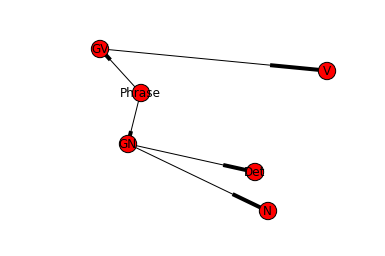

In [16]:
limits=plt.axis('off')
nx.draw_networkx(arbre)

Code Golf :
- number of cycles in permutation

In [4]:
f=lambda p,i=1:i and(not p[i-1])+f(p[:i-1]+[0]+p[i:],p[i-1]or max(p))
f([7,3,2,6,4,5,1])

3

In [ ]:
import random as rd

In [ ]:
%%time
tirages=[]
for i in range(100000000):
    tirages.append(rd.getrandbits(45))
    

In [ ]:
chaine="ça va , bonjour, comment ça va"
mots=chaine.split(" ")
connecteur="ça va"
connecteurParties=connecteur.split(" ")
print mots, connecteurParties
for i in range(len(mots)-len(connecteurParties)+1):
    if connecteurParties==mots[i:i+len(connecteurParties)]:
        print "found"
    else:
        print "not found"

In [ ]:
import os,glob,fnmatch
dossier="/Users/gilles/Copy/Corpus 2015-2016/"
dossiersTRS={}
inconnusDossier={}
nombreBDL=0
for root, dirs, files in os.walk(dossier):
    dossierGroupe=root.split("Corpus 2015-2016/")[1].split("/")[0]
    trs=fnmatch.filter(files, "*-BDL.xml")
    if trs:
        nombreBDL+=1
        
nombreBDL

In [ ]:
import random
consonnes=list(u"ptbldgmnNfsçvzzrc")
for i in range(4):
    random.shuffle(consonnes)
    print u"".join(consonnes)

In [ ]:
import random as rd
examples=rd.sample(range(32),8)
for n,i in enumerate(examples):
    print i+1
    if (n+1)%2==0: print
#for n in range(4):
#    for i in range(2): 
#        print rd.randint(1,32)
#    print


In [ ]:
import pandas as pd
#source={"manger":{"prs3":["mange"],"inf":["manger"]},"asseoir":{"prs3":["assoit","assied"],"inf":["asseoir"]}}
source=[["mange","prs3","manger",12000],
        ["asseoir","inf","asseoir",20000],
        ["manger","inf","manger",50000],
        ["asseoit","prs3","asseoir",5000],
        ["assied","prs3","asseoir",7500]
        ]
table=pd.DataFrame(source,columns=["ortho","case","lexeme","fréquence"])
pd.pivot_table(table,index=["lexeme"],columns=["case"],values=["ortho","fréquence"],aggfunc=lambda x: set(x))

In [ ]:
import re,codecs,math
textFile="./test.txt"
with codecs.open(textFile,"r",encoding="utf8") as input:
    text=input.readlines()
    

def countWords(text):
    wordFreq={}
    nbWords=0
    for line in text:
        chunks=line.split(" ")
        for chunk in chunks:
            m=re.findall(u"\w+",chunk,re.UNICODE)
            if m:
                for element in m:
                    word=element.lower()
                    if not word in wordFreq:
                        wordFreq[word]=0
                    wordFreq[word]+=1
                    nbWords+=1
    return (wordFreq,nbWords)

def calculateEntropy(freqDict,total):
    entropy=0
    nbElements=0
    for element in freqDict:
        p=float(freqDict[element])/total
        entropy-=p*math.log(p,2)
        nbElements+=1
    if nbElements==total:
        return entropy
    else:
        return calculateEntropy(freqDict,nbElements)
(wordFreq,nbWords)=countWords(text)
entropy=calculateEntropy(wordFreq,nbWords)
print entropy, entropy/math.log(nbWords,2)

wordList = ['the', 'the', 'the', 'a', 'a', 'over', 'love', 'one', 'tree']    
(wordFreq,nbWords)=countWords(wordList)
entropy=calculateEntropy(wordFreq,nbWords)
print entropy, entropy/math.log(nbWords,2)


In [ ]:
#i=0;exec"print i%3/2*'Fizz'+i%5/4*'Buzz'or-~i;i+=1;"*100

In [ ]:
set([(1,2,3,4),(1,2,3,4),(1,2,3,4),(1,2,3,4),(1,2,3,4)])

In [ ]:
quad=[1,2,3,4]
tuple(quad)


In [4]:
import unicodedata
liste=[]
s = u"ɔ̃w̃ɔtɨ"
comb=False
prec=u""
for char in s:
    print char,
    if unicodedata.combining(char):
        liste.append(prec+char)
        prec=""
    else:
        liste.append(prec)
        prec=char
liste.append(prec)
print
print " ".join(liste)

ɔ ̃ w ̃ ɔ t ɨ
 ɔ̃  w̃  ɔ t ɨ


In [8]:
list(unicode(u"âbaè"))

[u'\xe2', u'b', u'a', u'\xe8']

In [ ]:
import itertools as it
liste=[1,2,3,4,5]
list(it.product(liste,liste))

In [ ]:
import igraph
igraph.draw([(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 2)])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
plt.plot(liste)

In [ ]:
liste=[u"_ _ _ α _ _ _ _ _",
       u"_ _ _ _ _ _ _ β _ _ _ _ _ _ _ _ _ _ _ _",
       u"_ γ _ _ _ _ _ _ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ δ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ _ ε _ _ _ _",
       u"ζ _ _ _ _ _ _ _ _ _ _ _ _"]

for element in liste:
    mot=element.replace(" ","")
    print len(mot)


In [ ]:
liste=[u"être au creux de la vague",
       u"extravagant",
       u"_ γ _ _ _ _ _ _ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ δ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ _ ε _ _ _ _",
       u"ζ _ _ _ _ _ _ _ _ _ _ _ _"]

for element in liste:
    mot=element.replace(" ","")
    print len(mot)


In [ ]:
from lxml import etree
xmlData="""
            <Turn>
            <Sync />
            texte1
            <Event />
            <disfluence>
            blabla1
            </disfluence>
            <Event />
            texte2
            </Turn>
        """
root=etree.fromstring(xmlData.replace("\n",""))

In [ ]:
for element in root.xpath("//Turn/text()"):
    print element

In [ ]:
xmlTest='''
<Turn speaker="spk1 spk5" startTime="97.746" endTime="99.988">
<Sync time="97.746">
<Who nb="1"/>
deux trois ou quatre
<Who nb="2"/>

<Event desc="conv" type="noise" extent="instantaneous"/>

</Sync>
</Turn>
<Turn speaker="spk6" startTime="99.988" endTime="102.521">
<Sync time="99.988">

<Event desc="rire en fond" type="noise" extent="instantaneous"/>

</Sync>
</Turn>
'''

In [ ]:
import re
essai = re.sub(r'<Who nb="2"/>(.*?)(</Sync>)',r'<Who nb="2">\1</Who>\2',xmlTest,flags=re.DOTALL)
#essai = re.search(re.escape('^(<Who nb="2"/>)'),xmlTest,flags=re.MULTILINE)
print essai

In [ ]:
test='''a
b
c
d
'''
retest= re.sub("(b.*d)","\1",test, flags=re.DOTALL)
print retest


In [ ]:
test=[
"b13135",
"ee7275",
"ca7074",
"d1afb0",
"561216",
"8b3338",
"997577",
"9d4d5a",
"ef123a",
"cd1234",
"b01231",
"cb3155",
"871132",
"e24e79",
"bc5176",
"ee8db0",
"d96e9b",
"72334e",
"edb1cf",
"cd8eb0",
"6e104a",
"a71774",
"ed8fce",
"c12d93",
"ad689b",
"4e3139",
"ce4fb9",
"92498a",
"4f0f4b",
"741172",
"753273",
"c971c6",
"eeb2ed",
"d2afd1",
"ed8eec",
"d091d0",
"efd3ef",
"f8e8f8",
"cf8fec",
"501270",
"8f50b5",
"332057",
"693e90",
"9c69ce",
"b18ed3",
"503074",
"ceb2ee",
"655874",
"b08ced",
"321173",
"120f1c",
"6e5ea6",
"5941c2",
"9a96ab",
"372fa8",
"6a67d9",
"b1b0ed",
"8989ce",
"b0b0d1",
"e8e8f8",
"0b0e74",
"303270",
"878aee",
"0c1047",
"0b25f0",
"344cf0",
"0b26d0",
"333839",
"0a25b0",
"cfd4ee",
"304ccb",
"0a2a90",
"364e89",
"0a51ee",
"3571f1",
"0a51d0",
"3a6ed0",
"0b316f",
"3e69b0",
"88b2ef",
"0a50b1",
"0b70f0",
"3690f2",
"d8e8f8",
"096fd0",
"0b4f90",
"5caaf0",
"0a2f4e",
"1d81d8",
"448fd1",
"b0d3ef",
"0b8fef",
"1d81c8",
"88b2cf",
"0888d8",
"0971af",
"1d98df",
"0888c8",
"1d82b8",
"34b2f0",
"6799b4",
"c8e8f8",
"0898d8",
"366e88",
"5cacd1",
"91d2ef",
"0b4f6b",
"3f90b1",
"0888b8",
"0db0ed",
"1d98c8",
"0898c8",
"0a6f91",
"18a8d8",
"1d80a2",
"08a8d8",
"71d1ee",
"0888a8",
"1d98b8",
"2fb1d0",
"08a8c8",
"0898b8",
"18b8d8",
"18a8c8",
"50d1ee",
"08b8d8",
"30d0ee",
"0eceec",
"0898a8",
"1da8b8",
"08c8d8",
"08b8c8",
"08a8b8",
"18c8d8",
"18b8c8",
"1d98a2",
"4ecbd2",
"31cfd5",
"70d0d3",
"91eff2",
"b1eff2",
"678889",
"098f91",
"0fedee",
"31edef",
"51edf0",
"71eef1",
"90d1d2",
"08d8d8",
"08c8c8",
"08b8b8",
"08a8a8",
"18d8d8",
"1fc8c6",
"1eb8b8",
"c8f8f8",
"b1d3d3",
"c8e8e8",
"d8f8f8",
"d8e8e8",
"e8f8f8",
"1ea8a4",
"40b6b3",
"0b736e",
"08d8c5",
"0bc8b8",
"3b948c",
"08bca7",
"0cead5",
"20d9c4",
"31ead4",
"51ead5",
"09ac92",
"20bda4",
"70ead4",
"68c1b2",
"0a4b3e",
"cfd4d3",
"91ead4",
"b2ebd4",
"c8f8e4",
"d8f8e8",
"a8c6b2",
"d3ead6",
"e8f8e8",
"cfecb4",
"e8f8d8",
"97a97b",
"e4f8c5",
"d4eb8d",
"f8f8c8",
"e8e8c8",
"f8f8d8",
"e8e8d8",
"f8f8e8",
"d3ce8f",
"f5ea8e",
"f5ecb1",
"d3cfb2",
"d3b10e",
"f4ce16",
"d3b430",
"f3d041",
"d2b551",
"9a7b28",
"f3d06a",
"f3af0d",
"675833",
"d2b571",
"d28f0d",
"f2b030",
"f3d190",
"f8e8c8",
"f2b051",
"f2900d",
"d28f31",
"d16f0e",
"f29030",
"f2b070",
"f2d2b0",
"f8e8d8",
"d08f51",
"d0af91",
"f2700d",
"f19150",
"d06f31",
"cf4f0d",
"f17130",
"f1b090",
"cf8f71",
"f2500d",
"8b310f",
"af4f2c",
"f09170",
"f0714f",
"cd6e51",
"b12f0f",
"f0320b",
"d02f0e",
"ef5130",
"d14e31",
"f0d2cf",
"f0100a",
"ce100b",
"f0b1af",
"b10e0c",
"8a0d0d",
"ed3432",
"ce322f",
"ee5251",
"c9504f",
"ef918f",
"080000",
"f8e8e8",
"f8f8f8",
"e8e8e8"
]

In [ ]:
valeurs={"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"a":10,"b":11,"c":12,"d":13,"e":14,"f":15}
total=[0,0,0,0,0,0]
for element in test:
    for i in range(6):
        total[i]+=valeurs[element[i]]

In [ ]:
for element in [item for sublist in [[x[i:i+2] for i in range(0, len(x), 2)] for x in test[30:]] for item in sublist]:
    print element,

In [ ]:
webcolors.css3_hex_to_names

In [ ]:
for element in sorted(test):
    print element

In [ ]:
from IPython.lib import passwd
passwd()

In [ ]:
import itertools
def calculation(n):
    result=(n[0]+13*n[1]/n[2]+n[3]+12*n[4]-n[5]-11+n[6]*n[7]/n[8]-10)
    if result==66:
        return n
    else:
        return []

In [ ]:
num=1
for n in itertools.permutations(xrange(1,10)):
    if n[1]%n[2]==0 and n[6]*n[7]%n[8]==0:
        order=calculation(n)
        if order:
            print num, order
            num+=1